In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# First, we will generate some random time-series data to plot:
rs = np.random.RandomState(10000)
values = rs.randn(10000, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=10000, freq="D")
timeseries_df = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"]).rolling(7).mean()
timeseries_df = timeseries_df.dropna()

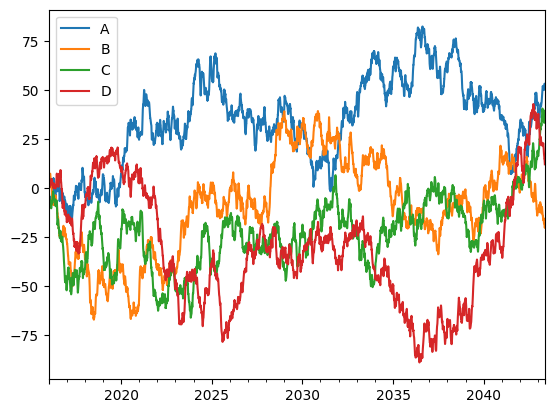

In [4]:
ax = timeseries_df.plot()

In [5]:
display(timeseries_df)

,A,B,C,D
2016-01-07,-2.412283,0.236113,-1.089437,0.436217
2016-01-08,-2.580437,0.131977,-1.485576,0.822589
2016-01-09,-2.701870,0.254042,-1.906160,0.998056
2016-01-10,-2.952274,0.422729,-2.234545,1.302876
2016-01-11,-3.361802,0.595078,-2.900361,1.418540
...,...,...,...,...
2043-05-14,53.202164,-19.323103,38.315731,13.976134
2043-05-15,53.168189,-19.630226,38.718294,13.687414
2043-05-16,53.027260,-19.975731,39.071870,13.412063
2043-05-17,52.943266,-20.151744,39.314451,12.838135


In [6]:
# rolling?
def calculate_iqr(window):
    return np.percentile(window, 75) - np.percentile(window, 25)

timeseries_df["iqr"] = timeseries_df["B"].rolling(window=1000).apply(calculate_iqr, raw=True)


In [7]:
# until current?
timeseries_df['cum'] = timeseries_df['B'].expanding().apply(calculate_iqr, raw=True)

In [8]:
def summation(window):
    return window.sum()

timeseries_df["sum_exp"] = timeseries_df['B'].expanding().apply(summation, raw=True)
timeseries_df["sum_win"] = timeseries_df["B"].rolling(window=1000).apply(summation, raw=True)


,A,B,C,D,iqr,cum,sum_exp,sum_win
2016-01-07,-2.412283,0.236113,-1.089437,0.436217,NaN,0.000000,0.236113,NaN
2016-01-08,-2.580437,0.131977,-1.485576,0.822589,NaN,0.052068,0.368090,NaN
2016-01-09,-2.701870,0.254042,-1.906160,0.998056,NaN,0.061033,0.622132,NaN
2016-01-10,-2.952274,0.422729,-2.234545,1.302876,NaN,0.086135,1.044861,NaN
2016-01-11,-3.361802,0.595078,-2.900361,1.418540,NaN,0.186616,1.639939,NaN
...,...,...,...,...,...,...,...,...
2043-05-14,53.202164,-19.323103,38.315731,13.976134,14.944673,32.867630,-91446.270399,4337.078745
2043-05-15,53.168189,-19.630226,38.718294,13.687414,15.045319,32.864587,-91465.900625,4317.609678
2043-05-16,53.027260,-19.975731,39.071870,13.412063,15.079381,32.861544,-91485.876356,4297.957770
2043-05-17,52.943266,-20.151744,39.314451,12.838135,15.147114,32.858501,-91506.028100,4278.378963


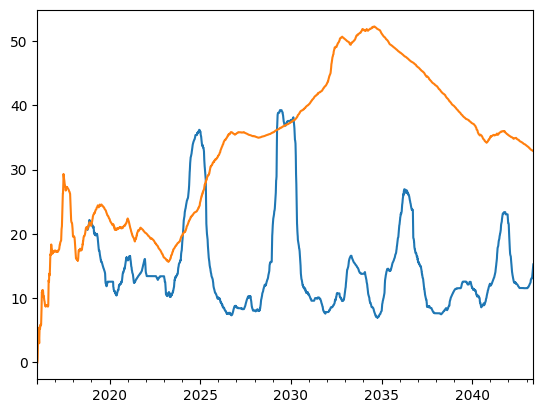

In [9]:
display(timeseries_df)
ax = timeseries_df["iqr"].plot()
ax = timeseries_df["cum"].plot()

In [10]:
rs = np.random.RandomState(10000)
values = rs.randn(10000, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=10000, freq="D")
timeseries_df = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"]).rolling(7).mean()
timeseries_df = timeseries_df.dropna()

df = pd.melt(
    timeseries_df,
    id_vars=[],          # Columns to keep as identifiers
    var_name='category',       # Name for the category column (original column names)
    value_name='value'         # Name for the data column (values from original columns)
)

In [11]:
df['rolling_sum'] = (
    df.groupby('category')['value']
    .rolling(window=3, min_periods=2)  # Adjust window size and minimum periods as needed
    .apply(summation , raw=True)
    .reset_index(level=0, drop=True)  # Drop the group index
)

In [12]:
display(df)

,category,value,rolling_sum
0,A,-2.412283,NaN
1,A,-2.580437,-4.992720
2,A,-2.701870,-7.694590
3,A,-2.952274,-8.234581
4,A,-3.361802,-9.015947
...,...,...,...
39971,D,13.976134,43.236759
39972,D,13.687414,42.070579
39973,D,13.412063,41.075611
39974,D,12.838135,39.937611
